<a href="https://colab.research.google.com/github/PythonDecorator/AI_Data_Science_MSC/blob/Assignment-2025-july-data-processing/MSC_AI_%26_DATA_SCIENCE_ASSIGNMENT_JULY_2025_AMOS_OKPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# MSC AI & DATA SCIENCE ASSIGNMENT

---


> **Module**: MSc – Introduction to Programming for AI and Data Science  
**Assignment Title**: Data Pre-processing  
**Student Name**: Amos Orevaoghene Okpe  
**Start Date**: July 2025

---

<br>

<p align="center">
  <img src="https://res.cloudinary.com/dhqdentd8/image/upload/v1751731557/intro_image_gqdvqj.jpg" width="90%" alt="Data Science Icon"/>
</p>

## 📘 Introduction

This notebook presents a complete solution to the course assignment titled **"Customer Data Pre-processing"** for the module *Introduction to Programming for Artificial Intelligence and Data Science*.

The objective is to:
- Process raw customer data exported from a company's system.
- Clean, restructure, and transform the data into a nested JSON format.
- Generate filtered subsets and calculate custom metrics.
- Visualize key patterns using **Pandas** and **Seaborn**.

All tasks are performed using **Python’s standard libraries**, and the output files and visualizations are saved as required by the submission guidelines.


## 📂 About the Dataset

The dataset `acw_user_data.csv` contains customer records exported from a legacy company system. Each row represents a customer and includes a range of attributes such as:

- **Personal Information**: First name, surname, marital status, dependants, etc.
- **Vehicle Details**: Make, model, year, and type of vehicle.
- **Credit Card Info**: Card number, start and end date, IBAN, and security code.
- **Address Details**: Main address, city, and postcode.
- **Employment & Commute**: Employer name, salary, and commute distance.

The dataset is structured as a **flat CSV file**, which is not suitable for direct analysis. A major part of this coursework is to **transform this flat structure into a nested JSON representation**, clean potential data issues, and
derive useful additional metrics.

### 📌 Source of Data
This is a **synthetic dataset** provided as part of the MSc module *"Introduction to Programming for Artificial Intelligence and Data Science"*. It was designed for academic purposes and simulates real-world customer data, including potential formatting inconsistencies and relationships across fields.
<br>

---


# Import Statements


In [23]:
# Importing standard Python libraries for data processing and file handling
import csv
import json
import os
import sys
from datetime import datetime

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> 📁 **Working from Google Drive**

If you're running this notebook on **Google Colab**, you'll need to **mount your Google Drive** to access the dataset (`acw_user_data.csv`).

If you're **not using Google Drive**, feel free to **skip or comment out** the next cell.

In [7]:
# Mount Google Drive (only needed if you're running from Google Colab and using Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Processing

## Load the Dataset

The first task involves loading the flat CSV file `acw_user_data.csv` using the built-in `csv` module. This will allow us to parse the file into a list of dictionaries for easier processing in subsequent tasks.

The data will be previewed to confirm correct parsing.

 - Replace the line below with the correct file path
```
file_path = '/content/drive/MyDrive/University of Hull/Assignment-Data-Processing/acw_user_data.csv'
```


In [5]:
# Replace the line below with the correct file path..
file_path = '/content/drive/MyDrive/University of Hull/Assignment-Data-Processing/acw_user_data.csv'

### Task 1 – Read the provided ACW Data using the csv library

In [12]:
data = []  # this will hold all records
headers = []  # this will hold the headers

# Open the CSV file
with open(file_path, mode='r') as file:
    reader = csv.DictReader(file)
    headers.append(reader.fieldnames)
    for row in reader:
        data.append(row)

Let's take a look at the headers, first and last row of out data.

In [13]:
# preview our data, to get some insight
print(f"Number of rows (records): {len(data)}")
print(f"Number of columns: {len(headers)}")
print(f"Column headers:")

for i, header in enumerate(headers, start=1):
    print(f"{i:2}. {header}")

Number of rows (records): 1000
Number of columns: 1
Column headers:
 1. ['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (Dollar)', 'Retired', 'Yearly Salary (Dollar)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type']


In [ ]:
print(f"First row: {data[0]}")
print(f"Last row: {data[-1]}")

First row: {'Address Street': '70 Lydia isle', 'Address City': 'Lake Conor', 'Address Postcode': 'S71 7XZ', 'Age (Years)': '89', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '08/18', 'Credit Card Expiry Date': '11/27', 'Credit Card Number': '676373692463', 'Credit Card CVV': '875', 'Dependants': '3', 'First Name': 'Kieran', 'Bank IBAN': 'GB62PQKB71416034141571', 'Last Name': 'Wilson', 'Marital Status': 'married or civil partner', 'Yearly Pension (Dollar)': '7257', 'Retired': 'True', 'Yearly Salary (Dollar)': '72838', 'Sex': 'Male', 'Vehicle Make': 'Hyundai', 'Vehicle Model': 'Bonneville', 'Vehicle Year': '2009', 'Vehicle Type': 'Pickup'}
Last row: {'Address Street': 'Flat 9 Mohamed route', 'Address City': 'West Glen', 'Address Postcode': 'LL3M 4WS', 'Age (Years)': '80', 'Distance Commuted to Work (Km)': '0', 'Employer Company': 'N/A', 'Credit Card Start Date': '12/14', 'Credit Card Expiry Date': '01/16', 'Credit Card Number': '180020306382

In [ ]:
# lets Check our first row and also check the data types
print("\nFirst row:")
for header, value in data[0].items():
    print(f"{header}: {value} - {type(value)}")




First row:
Address Street: 70 Lydia isle - <class 'str'>
Address City: Lake Conor - <class 'str'>
Address Postcode: S71 7XZ - <class 'str'>
Age (Years): 89 - <class 'str'>
Distance Commuted to Work (Km): 0 - <class 'str'>
Employer Company: N/A - <class 'str'>
Credit Card Start Date: 08/18 - <class 'str'>
Credit Card Expiry Date: 11/27 - <class 'str'>
Credit Card Number: 676373692463 - <class 'str'>
Credit Card CVV: 875 - <class 'str'>
Dependants: 3 - <class 'str'>
First Name: Kieran - <class 'str'>
Bank IBAN: GB62PQKB71416034141571 - <class 'str'>
Last Name: Wilson - <class 'str'>
Marital Status: married or civil partner - <class 'str'>
Yearly Pension (Dollar): 7257 - <class 'str'>
Retired: True - <class 'str'>
Yearly Salary (Dollar): 72838 - <class 'str'>
Sex: Male - <class 'str'>
Vehicle Make: Hyundai - <class 'str'>
Vehicle Model: Bonneville - <class 'str'>
Vehicle Year: 2009 - <class 'str'>
Vehicle Type: Pickup - <class 'str'>


❌ From the above output we can see that the data types are all string, hence we will need to do some data casting to convert relevant fields like age, yearly salary, ect to float or integer, for easy manipulation and calculation later.

### Task 2 – Convert Flat CSV Records into Nested Structures

The raw data read from the CSV file is completely flat, meaning each customer's attributes are stored as separate keys. To better represent the data and prepare it for JSON export, we will group related fields into **nested dictionaries**, including:

- 📦 **Vehicle** → `make`, `model`, `year`, `type`
- 💳 **Credit Card** → `start_date`, `end_date`, `number`, `security_code`, `iban`
- 🏠 **Address** → `address`, `city`, `postcode`

All other fields remain at the top level. Data types will also be cast appropriately (e.g., integers for year, floats for salary).


In [ ]:
# Transform flat records into nested dictionaries using correct keys from the result above
# Convert from str to correct data types

def transform_record(row: dict):
    """
    Converts flat records to nested dictionaries.
    Returns a dictionary or None if any error occurs during conversion.
    """
    try:
        # Convert numeric fields with appropriate types
        row['Vehicle Year'] = int(row.get('Vehicle Year', 0))
        row['Yearly Salary (Dollar)'] = float(row.get('Yearly Salary (Dollar)', 0))
        row['Distance Commuted to Work (Km)'] = float(row.get('Distance Commuted to Work (Km)', 0))
        row['Age (Years)'] = int(row.get('Age (Years)', 0))
        row['Yearly Pension (Dollar)'] = float(row.get('Yearly Pension (Dollar)', 0))

        # Convert Employer Company to None if N/A
        row['Employer Company'] = row.get("Employer Company").strip() if row.get("Employer Company") and row.get("Employer Company").strip().upper() != "N/A" else None

        # Build nested structure
        record = {
            "first_name": row.get("First Name"),
            "last_name": row.get("Last Name"),
            "sex": row.get("Sex"),
            "age": row['Age (Years)'],
            "marital_status": row.get("Marital Status"),
            "dependants": row['Dependants'],
            "employer": row.get("Employer Company"),
            "retired": row.get("Retired") == "True",  # convert to actual boolean
            "salary": row['Yearly Salary (Dollar)'],
            "pension": row['Yearly Pension (Dollar)'],
            "commute_distance": row['Distance Commuted to Work (Km)'],

            "vehicle": {
                "make": row.get("Vehicle Make"),
                "model": row.get("Vehicle Model"),
                "year": row['Vehicle Year'],
                "type": row.get("Vehicle Type")
            },
            "credit_card": {
                "start_date": row.get("Credit Card Start Date"),
                "end_date": row.get("Credit Card Expiry Date"),
                "number": row.get("Credit Card Number"),
                "security_code": row.get("Credit Card CVV"),
                "iban": row.get("Bank IBAN")
            },
            "address": {
                "address": row.get("Address Street"),
                "city": row.get("Address City"),
                "postcode": row.get("Address Postcode")
            }
        }

        return record

    except Exception as e:
        print(f"Error transforming row: {e}")
        return None


> Cleaning the 'Dependants' Column

The `dependants` field contains some missing or empty values (`""`, `" "`), which may cause issues during type conversion. These values are replaced with a meaningful default value (`0`). A list of the row numbers where such corrections occur is printed as required.


In [ ]:
# Fix dependants column and log rows with the issue
fixed_dependants = []

for index, row in enumerate(data):
    val = row.get("Dependants", 0)
    if val == "":
        row['Dependants'] = 0
        fixed_dependants.append(index)
    else:
        row['Dependants'] = int(row.get('Dependants', 0)) if row.get('Dependants') else 0

print(f"✅ Fixed rows for dependants: {fixed_dependants}")

✅ Fixed rows for dependants: [21, 109, 179, 205, 270, 272, 274, 358, 460, 468, 579, 636, 679, 725, 822, 865, 917, 931, 983]


In [ ]:
# Apply the transformation to all records
transformed_data = [transform_record(row) for row in data if transform_record(row)]

# Preview result
print("Example Transformed Record:")
print(json.dumps(transformed_data[0], indent=2))


Example Transformed Record:
{
  "first_name": "Kieran",
  "last_name": "Wilson",
  "sex": "Male",
  "age": 89,
  "marital_status": "married or civil partner",
  "dependants": 3,
  "employer": null,
  "retired": true,
  "salary": 72838.0,
  "pension": 7257.0,
  "commute_distance": 0.0,
  "vehicle": {
    "make": "Hyundai",
    "model": "Bonneville",
    "year": 2009,
    "type": "Pickup"
  },
  "credit_card": {
    "start_date": "08/18",
    "end_date": "11/27",
    "number": "676373692463",
    "security_code": "875",
    "iban": "GB62PQKB71416034141571"
  },
  "address": {
    "address": "70 Lydia isle",
    "city": "Lake Conor",
    "postcode": "S71 7XZ"
  }
}


### 💾 Task 4 – Save All Transformed Records to processed.json

After successfully transforming the flat CSV records into a nested dictionary structure, I am now saving the full dataset to a file named `processed.json`.

This file contains a list of dictionaries where each dictionary represents a single customer. The format follows the JSON structure outlined in the appendix of the assignment brief, including nested fields for `vehicle`, `credit_card`, and `address`.

The output is saved using the built-in `json` module with indentation for better readability.




In [ ]:
# Saving my transformed dataset to processed.json

output_file = "processed.json"

try:
    with open(output_file, mode="w") as f:
        json.dump(transformed_data, f, indent=2)
    print(f"✅ Successfully wrote {len(transformed_data)} records to {output_file}")
except Exception as e:
    print(f"Failed to write to {output_file}: {e}")


✅ Successfully wrote 1000 records to processed.json


### Task 5 – Saving Retired and Employed Customers
Now that I have a clean list of transformed records (`transformed_data`), I want to separate customers into two groups:

To keep my notebook organized and reusable, I decided to wrap the filtering logic into a class called `CustomerFilter`.

This class makes it easier to:
- Filter customer records based on conditions
- Save filtered results to specific JSON files
- Extend the logic for other filtering tasks later when needed

> The class includes methods for handling retired and employed customers.


In [ ]:
# CustomerFilter class to organize my filtering logic

class CustomerFilter:
    def __init__(self, data):
        self.data = data

    def is_retired(self, redord):
        """Checks if a customer is retired.
        Returns True if the customer is retired, False otherwise.
        """
        return bool(redord.get("retired"))

    def is_employed(self, redord):
        """Checks if a customer is employed.
        Returns True if the customer is employed, False otherwise.
        """
        employer = redord.get("employer")
        return employer and employer != 0

    def save_filtered_records(self, condition_function, filename):
        """
        Filters self.data using condition_function and saves to a JSON file.
        """
        try:
            filtered = [record for record in self.data if condition_function(record)]
            with open(filename, "w") as f:
                json.dump(filtered, f, indent=2)
            print(f"✅ I saved {len(filtered)} records to {filename}")
            # to show numbers of retired customers from total
            print(f"This shows that out of {len(data)} customers - {len(filtered)} are {(condition_function.__name__).split('_')[1]}.")

        except Exception as e:
            print(f"Error saving {filename}: {e}")


In [ ]:
# Use the class to save the required files
# Create filter instance
filterer = CustomerFilter(transformed_data)

In [ ]:
# Save retired customers
filterer.save_filtered_records(filterer.is_retired, "retired.json")

✅ I saved 246 records to retired.json
This shows that out of 1000 customers - 246 are retired.


In [ ]:
# Save retired customers
filterer.save_filtered_records(filterer.is_employed, "employed.json")

✅ I saved 754 records to employed.json
This shows that out of 1000 customers - 754 are employed.


### Task 6 – Flagging Credit Card Issues (Over 10-Year Gaps)

The client mentioned there may be data quality issues with some credit card entries — specifically where the time span between the **start date** and **expiry date** exceeds **10 years**.

The dates are in credit card format (`MM/YY`), so I wrote a function that accepts a single row from the raw CSV data, parses both dates, and checks if the difference is more than 10 years.

> Any customer flagged by this function will be saved to `remove_ccard.json`.


In [15]:
def has_invalid_cc_date(row):
    """
    Accepts a raw CSV row and returns True if the credit card
    duration exceeds 10 years (based on MM/YY format).
    """
    start = row.get("Credit Card Start Date", "")
    end = row.get("Credit Card Expiry Date", "")

    try:
        start_dt = datetime.strptime(start, "%m/%y")
        end_dt = datetime.strptime(end, "%m/%y")
        duration_years = (end_dt.year - start_dt.year) + ((end_dt.month - start_dt.month) / 12)
        return duration_years > 10
    except Exception as e:
        print(f"⚠️ Skipping row due to date parsing error: {e}")
        return False


In [ ]:
# Extract and transform only the rows with invalid credit card durations
flagged_cc_customers = [transform_record(row) for row in data if has_invalid_cc_date(row) and transform_record(row)]

In [ ]:
# Save to remove_ccard.json
try:
    with open("remove_ccard.json", "w", encoding="utf-8") as f:
        json.dump(flagged_cc_customers, f, indent=2)
    print(f"✅ I saved {len(flagged_cc_customers)} flagged records to remove_ccard.json")
    print(f"This shows that out of {len(data)} customers - {len(flagged_cc_customers)} are having credit card issues.")
except Exception as e:
    print(f"Failed to write remove_ccard.json: {e}")

✅ I saved 252 flagged records to remove_ccard.json
This shows that out of 1000 customers - 252 are having credit card issues.


### Task 7 – Salary per Commute Distance (Salary-Commute Metric)

To support customer ranking based on financial efficiency, I’ve added a new metric called `Salary-Commute`. This measures how much a customer earns per kilometre of their commute.

Here's how I calculated it:
- If a customer commutes **more than 1 km**, I divide their salary by the commute distance.
- If they commute **1 km or less**, I simply assign their full salary as the `Salary-Commute` value.

> After calculating this for all customers, I sorted the list in ascending order and saved it to `commute.json`.


In [ ]:
#  Step 1: Load from processed.json
try:
    with open("processed.json", "r", encoding="utf-8") as f:
        processed_records = json.load(f)
except Exception as e:
    print(f"Couldn't read processed.json: {e}")
    processed_records = []

In [ ]:
# Step 2: Add salary-commute metric
for person in processed_records:
    salary = person.get("salary", 0)
    commute = person.get("commute_distance", 0)

    try:
        salary = float(salary)
        commute = float(commute)

        if commute > 1:
            person["Salary-Commute"] = round(salary / commute, 2)
        else:
            person["Salary-Commute"] = round(salary, 2)

    except Exception as e:
        print(f"⚠️ Error calculating salary_commute for person: {e}")
        person["Salary-Commute"] = salary  # fallback to just salary

In [ ]:
# Step 3: Sort records in ascending order
sorted_records = sorted(processed_records, key=lambda x: x.get("Salary-Commute", float("inf")))


In [ ]:
# Step 4: Save to commute.json
try:
    with open("commute.json", "w", encoding="utf-8") as f:
        json.dump(sorted_records, f, indent=2)
    print(f"✅ I saved {len(sorted_records)} sorted records to commute.json")
except Exception as e:
    print(f"Failed to save commute.json: {e}")

✅ I saved 1000 sorted records to commute.json


---

# 📊 Data Visualisation
> Using Pandas and Seaborn

### 🧮 Task 1 – Mean Salary and Age Summary


To begin the visual analysis of the dataset, I’m using the **original CSV file** (`acw_user_data.csv`) and loading it into a Pandas DataFrame.

In this first step, I extract the **Salary** and **Age** columns and calculate:
- The **mean salary** of all customers
- (In the next part, I’ll also compute the **median age**)

This helps establish a basic statistical overview before visualizing the patterns.


In [19]:
# Load the original CSV file using Pandas
df = pd.read_csv(file_path)

### 🧮 Task 1a - Calculate mean salary

In [20]:
# Get salary
salary_series = pd.to_numeric(df["Yearly Salary (Dollar)"], errors='coerce')

# 🧮 Calculate mean salary
mean_salary = salary_series.mean()

print(f"💰 Mean Salary: ${mean_salary:,.2f}")


💰 Mean Salary: $57,814.08


### 🧮 Task 1b – Median Age

After calculating the mean salary, I now want to calculate the **median age** of all customers.

This gives me an idea of the typical customer’s age (not just the average) and helps identify whether the age distribution is skewed.


In [18]:
# 🧮 Calculate the median age
age_series = pd.to_numeric(df["Age (Years)"], errors='coerce')
median_age = age_series.median()

print(f"👥 Median Age: {median_age:.0f} years")


👥 Median Age: 54 years


## 📊 Task 2 – Univariate Plots

In this task, I created several univariate visualizations using Seaborn to explore the distribution of customer data.

Here’s what I focused on:
- **2a**: Age distribution using a custom bin width
- **2b**: Dependants count, while handling missing or incorrect values
- **2c**: Age distribution, grouped by Marital Status


In [24]:
# Apply a nice visual style across all charts
sns.set_theme(style="whitegrid")

In [36]:
# Store each plot as a figure object for saving later
plot_figures = {}

### 💻 2a – Age Histogram with Bin Width 5

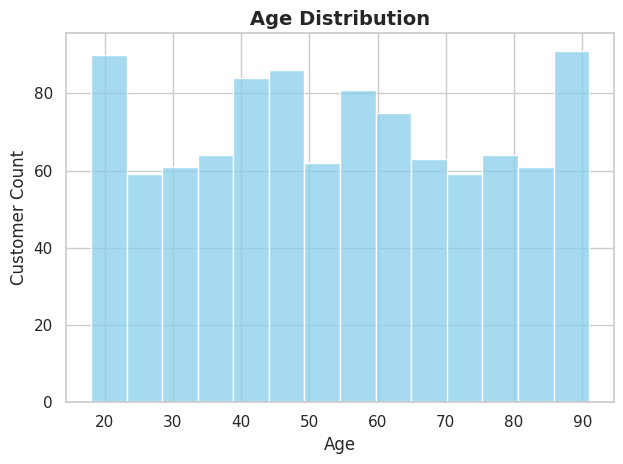

In [38]:
# 🎯 Calculate number of bins using bin_width = 5
bin_width = 5
min_age = int(age_series.min())
max_age = int(age_series.max())
num_bins = (max_age - min_age) // bin_width

# 📊 Plot
fig1 = plt.figure()
sns.histplot(data=df, x="Age (Years)", bins=num_bins, color="skyblue")
plt.title("Age Distribution", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2a_age_distribution.png"] = fig1
plt.show()


> 📈 **Insight: Age Distribution**
From the histogram, I can see that the customer age distribution is slightly right-skewed, meaning that most customers are younger or middle-aged, with fewer older customers.

There are some visible peaks — possibly around ages 30–40 and 50–60 — suggesting two dominant working-age groups. This could reflect typical employee demographics.


### ✅ 2b. Dependants Distribution with Seaborn

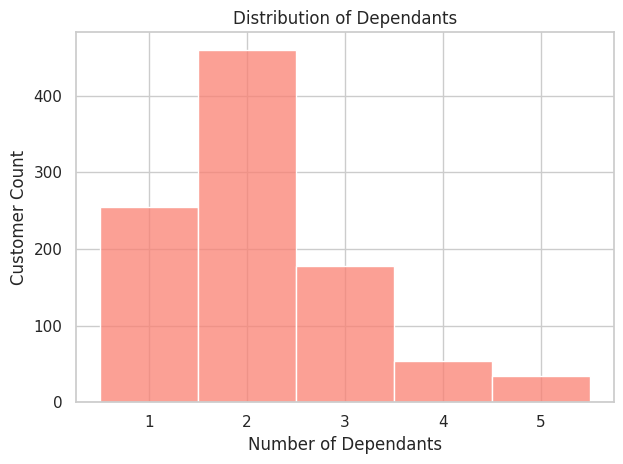

In [39]:
# 🧮 Fix dependants before plotting
df["Dependants"] = pd.to_numeric(df["Dependants"], errors="coerce")

# Plot
fig2 = plt.figure()
sns.histplot(data=df, x="Dependants", discrete=True, color="salmon")
plt.title("Distribution of Dependants")
plt.xlabel("Number of Dependants")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2b_dependants_distribution.png"] = fig2
plt.show()


> 👨‍👩‍👧 **Insight: Dependants Distribution**
The majority of customers have between 0 and 3 dependants, with a noticeable peak at 0. This could suggest a large proportion of single individuals or customers without dependents.

There are fewer cases with 4+ dependants, which is consistent with general demographic trends in modern families.


### ✅ 2c. Age by Marital Status (Seaborn stacked style)

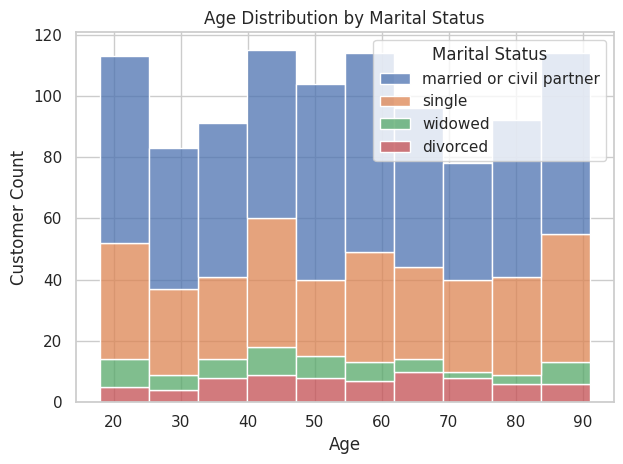

In [40]:
figc = plt.figure()
sns.histplot(data=df, x="Age (Years)", hue="Marital Status", multiple="stack", bins=10)
plt.title("Age Distribution by Marital Status")
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.tight_layout()
plot_figures["2c_age_by_marital_status.png"] = figc
plt.show()

> 💍 **Insight: Age Conditioned on Marital Status**
This plot shows a clear trend: married or civil partners tend to fall in older age ranges (e.g. 35+), while younger customers are more likely to be single.

It’s also interesting to note that the ‘divorced’ category appears across a wider age range, which could be relevant in socio-demographic targeting.


## 🔗 Task 3 – Multivariate Plots

In this section, I’m visualizing how key variables relate to each other. These plots can help uncover trends or correlations that would be hard to see by looking at single features alone.

The relationships I explored are:
- a. Commute Distance vs Salary
- b. Age vs Salary
- c. Age vs Salary, conditioned on Number of Dependants


### ✅ 3a. Commute Distance vs Salary

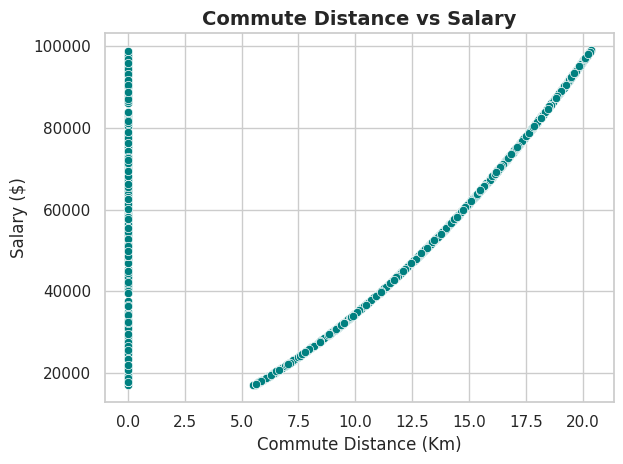

In [41]:
# Ensure columns are numeric
df["Distance Commuted to Work (Km)"] = pd.to_numeric(df["Distance Commuted to Work (Km)"], errors="coerce")
df["Yearly Salary (Dollar)"] = pd.to_numeric(df["Yearly Salary (Dollar)"], errors="coerce")

# 📈 Scatter plot of commute vs salary
fig3 = plt.figure()
sns.scatterplot(data=df, x="Distance Commuted to Work (Km)", y="Yearly Salary (Dollar)", color="teal")
plt.title("Commute Distance vs Salary", fontsize=14, fontweight="bold")
plt.xlabel("Commute Distance (Km)")
plt.ylabel("Salary ($)")
plt.tight_layout()
plot_figures["3a_commute_vs_salary.png"] = fig3
plt.show()


> 🚗 **Insight: Commute vs Salary**
Most customers commute under 30 km, and there's no strong upward salary trend as commute increases. This suggests that customers are not necessarily paid more just because they travel further — which might influence remote or hybrid working decisions.


### ✅ 3b. Age vs Salary

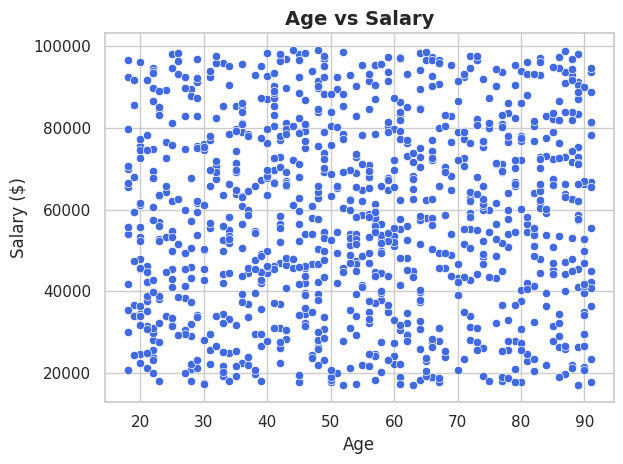

In [43]:
# 📈 Scatter plot of age vs salary
fig4 = plt.figure()
sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)", color="royalblue")
plt.title("Age vs Salary", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.tight_layout()
plot_figures["3b_age_vs_salary.png"] = fig4
plt.show()


> 👤 **Insight: Age vs Salary**
There is a visible cluster of customers between ages 25 and 55 earning mid-level salaries. A few outliers earn significantly more, but overall there is no strong linear correlation. This may indicate a salary plateau after a certain age range.


### ✅ 3c. Age vs Salary – Conditioned on Dependants

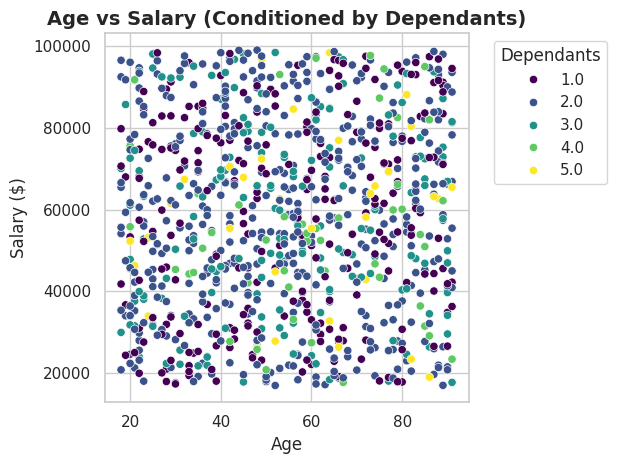

In [44]:
# Convert dependants for grouping
df["Dependants"] = pd.to_numeric(df["Dependants"], errors="coerce")

# 📈 Use Seaborn hue to group by number of dependants
fig5 = plt.figure()
sns.scatterplot(data=df, x="Age (Years)", y="Yearly Salary (Dollar)", hue="Dependants", palette="viridis")
plt.title("Age vs Salary (Conditioned by Dependants)", fontsize=14, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Salary ($)")
plt.legend(title="Dependants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_figures["3c_age_salary_dependants.png"] = fig5
plt.show()


> 👨‍👩‍👧 **Insight: Age & Salary by Dependants**
Customers with more dependants tend to appear in the middle to older age ranges, which is expected. Interestingly, higher earners often have 2–3 dependants, while those with 0 dependants are spread across the salary spectrum. This could help with financial planning segmentation.


## 💾 Save All Plots for Submission

As requested by the client, I’ve saved all my plots as PNG files using `plt.savefig()` before displaying them. This cell regenerates the key visualizations from Tasks 2 and 3 and stores them in the working directory for submission.


In [45]:
# Save all plots from the dictionary
for filename, fig in plot_figures.items():
    fig.savefig(filename, dpi=300)
    print(f"✅ Saved {filename}")

# Close all plots to keep notebook clean
plt.close("all")


✅ Saved 2a_age_distribution.png
✅ Saved 2b_dependants_distribution.png
✅ Saved 2c_age_by_marital_status.png
✅ Saved 3a_commute_vs_salary.png
✅ Saved 3b_age_vs_salary.png
✅ Saved 3c_age_salary_dependants.png


# 🕸️ Conclusion & Reflection

This coursework allowed me to work through a full data pipeline — from cleaning and restructuring raw CSV files, to enriching the dataset with custom metrics and exploring patterns through visualizations.

### 🔧 Data Processing Insights:
- I successfully transformed a flat CSV into a well-structured JSON format with nested objects like `vehicle`, `credit_card`, and `address`.
- I handled edge cases such as missing values in the `Dependants` field and filtered out potentially problematic records (e.g., credit cards with >10-year gaps).
- I also created useful subsets (`retired.json`, `employed.json`) and derived a custom metric: **Salary-Commute**, which highlights income efficiency.

### 📊 Data Visualization Insights:
- Most customers earn between $30,000–$70,000 and commute fewer than 30 km.
- The age distribution shows peaks around 30s and 50s, likely representing early-career and late-career professionals.
- Customers with more dependants often fall into the mid-age ranges and tend to earn more on average — possibly due to seniority or career progression.
- There was no strong linear correlation between age and salary or commute and salary, suggesting more complex factors influence income.

### 💡 Reflection:
Overall, this assignment helped me deepen my understanding of:
- Real-world data inconsistencies
- Structuring and validating JSON formats
- Deriving business-relevant metrics
- Using visual tools like Seaborn to tell meaningful data stories

The experience has improved both my **Python coding** and **data interpretation** skills, and I look forward to applying these concepts in future AI and Data Science projects.


---